# Chapter-9 : Q-7

## Import libraries and load dataset

In [42]:
import pandas as pd
import numpy as np
import statistics, math
import matplotlib.pyplot as plt

path = "D:\IIT JODHPUR\Semester-3\ML for Business\Assignment-2"
dataset = "auto_dataset.csv"
df = pd.read_csv(os.path.join(path, dataset))
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Drop the `name` attribute

In [43]:
name = df['name']
data = df.drop('name', axis=1)

### Check for NaN entries

In [44]:
for i in data.columns :
    num_nan = data[i].isnull().sum()
    if num_nan > 0:
        print(f"{i} column has {num_nan} NaN values")

## Correlation Check

In [45]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
correlation = data.corr()
correlation['mpg'][1:]

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin          0.565209
Name: mpg, dtype: float64

## 7(a) : Replace `mpg` column

Replace the values in `mpg` column as follows,

If `mpg` >= Median : **'High'** (1)  
Else : **'Low'** (0)

In [47]:
mpg = list(data['mpg'])
median = statistics.median(mpg)

if len(set(mpg)) > 2:
    for i in range(len(mpg)):
        if mpg[i] >= median:
            mpg[i] = 1
        else:
            mpg[i] = 0

data['mpg'] = mpg

## Checking Class Imbalance

Number of Instances with High MPG = 196 and Low MPG = 196


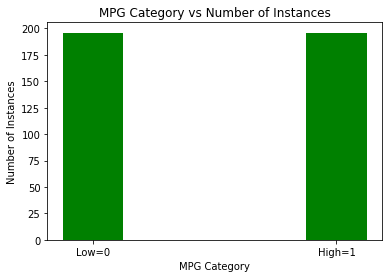

In [48]:
high = 0
low = 0
for i in range(len(data)):
    if data.loc[i]['mpg'] == 0:
        high += 1
    else:
        low += 1

print(f"Number of Instances with High MPG = {high} and Low MPG = {low}")

plt.bar([0, 1], [low, high], color='green', width=0.25)
plt.xlabel('MPG Category')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Low=0', 'High=1'])
plt.title('MPG Category vs Number of Instances')
plt.show()

## Visualization after PCA

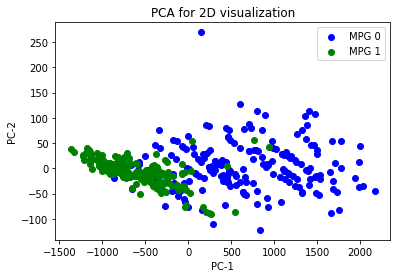

In [49]:
from sklearn.decomposition import PCA
X = np.array([np.asarray(data.loc[i][1:]) for i in range(len(data))])
y = np.array(data['mpg'])

X_pca = PCA(n_components=2).fit_transform(X)

x0 = []
x1 = []
for i in range(len(y)):
    if y[i] == 0:
        x0.append(X_pca[i])
    else:
        x1.append(X_pca[i])
x0 = np.array(x0)
x1 = np.array(x1)

plt.scatter(x0[:,0], x0[:,1], color='blue', label='MPG 0')
plt.scatter(x1[:,0], x1[:,1], color='green', label='MPG 1')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.title('PCA for 2D visualization')
plt.show()

## Data Splitting

In [50]:
split = 0.8
random_permutation = np.random.permutation(len(X))
train_size = math.ceil(len(X)*split)
test_size = math.ceil(len(X)*(1-split))

X_train = []
y_train = []
X_val = []
y_val = []

for i in random_permutation[:train_size]:
    X_train.append(X[i])
    y_train.append(y[i])
for i in random_permutation[train_size:train_size+test_size]:
    X_val.append(X[i])
    y_val.append(y[i])

print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 314	Validation size : 78


## 7(b) : Fit SVM with different `C` values and generate Cross-Validation Results

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

C = [0.001, 0.01, 0.1, 1, 10, 100]
ALL_MODELS = []

for c in C:
    model = SVC(C=c)
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    ALL_MODELS.append(pd.Series({'C' : c, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))

result = pd.DataFrame(ALL_MODELS)
result

,C,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,0.493671,0.493671,0.794872,0.871795,0.833333,0.697468,0.168169,0.474359,0.305240
1,0.010,0.506329,0.493671,0.794872,0.871795,0.833333,0.700000,0.165150,0.474359,0.305240
2,0.100,0.886076,0.924051,0.820513,0.897436,0.871795,0.879974,0.034315,0.948718,0.948616
3,1.000,0.898734,0.924051,0.833333,0.910256,0.846154,0.882506,0.036052,0.935897,0.935929
4,10.000,0.898734,0.924051,0.833333,0.910256,0.846154,0.882506,0.036052,0.923077,0.923077
5,100.000,0.886076,0.924051,0.833333,0.897436,0.910256,0.890230,0.031149,0.935897,0.935845


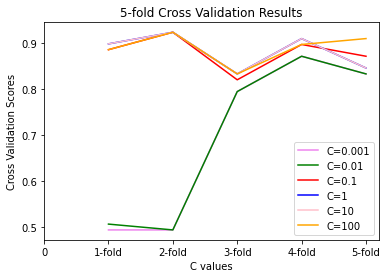

In [52]:
plt.plot(range(1, 6), result.loc[0][1:-4], color='violet', label='C=0.001')
plt.plot(range(1, 6), result.loc[1][1:-4], color='green', label='C=0.01')
plt.plot(range(1, 6), result.loc[2][1:-4], color='red', label='C=0.1')
plt.plot(range(1, 6), result.loc[3][1:-4], color='blue', label='C=1')
plt.plot(range(1, 6), result.loc[4][1:-4], color='pink', label='C=10')
plt.plot(range(1, 6), result.loc[5][1:-4], color='orange', label='C=100')
plt.legend()
plt.xlabel('C values')
plt.ylabel('Cross Validation Scores')
plt.title('5-fold Cross Validation Results')
plt.xticks(range(6), ['0', '1-fold', '2-fold', '3-fold', '4-fold', '5-fold'])
plt.show()

## 7(c) : Repeat (b) with RBF & Polynomial Kernels and different `gamma`, `degree` and `C`.

### RBF Kernel (`degree` hyperparameter is not required)

In [53]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = ['scale', 'auto']

ALL_MODELS = []
for c in C:
    for g in gamma :
        model = SVC(C=c, kernel='rbf', gamma=g)
        model.fit(X_train, y_train)
        scores = cross_val_score(model, X, y, cv=5)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_true=y_val, y_pred=y_pred)
        f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
        ALL_MODELS.append(pd.Series({'C' : c, 'gamma' : g, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))

result = pd.DataFrame(ALL_MODELS)
result

,C,gamma,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,scale,0.493671,0.493671,0.794872,0.871795,0.833333,0.697468,0.168169,0.474359,0.305240
1,0.001,auto,0.493671,0.493671,0.538462,0.525641,0.628205,0.535930,0.049394,0.474359,0.305240
2,0.010,scale,0.506329,0.493671,0.794872,0.871795,0.833333,0.700000,0.165150,0.474359,0.305240
3,0.010,auto,0.493671,0.493671,0.538462,0.525641,0.628205,0.535930,0.049394,0.474359,0.305240
4,0.100,scale,0.886076,0.924051,0.820513,0.897436,0.871795,0.879974,0.034315,0.948718,0.948616
5,0.100,auto,0.493671,0.493671,0.538462,0.525641,0.628205,0.535930,0.049394,0.474359,0.305240
6,1.000,scale,0.898734,0.924051,0.833333,0.910256,0.846154,0.882506,0.036052,0.935897,0.935929
7,1.000,auto,0.506329,0.506329,0.564103,0.538462,0.500000,0.523044,0.024549,0.487179,0.332948
8,10.000,scale,0.898734,0.924051,0.833333,0.910256,0.846154,0.882506,0.036052,0.923077,0.923077
9,10.000,auto,0.506329,0.518987,0.564103,0.551282,0.500000,0.528140,0.025220,0.512821,0.385094


### Polynomial Kernel

In [54]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = ['scale', 'auto']
degree = [i for i in range(2, 5)]

ALL_MODELS = []
for c in C:
    for g in gamma :
        for d in degree :
            if g == 'auto' and d >= 2:
                continue
            model = SVC(C=c, kernel='poly', gamma=g, degree=d)
            model.fit(X_train, y_train)
            scores = cross_val_score(model, X, y, cv=5)
            y_pred = model.predict(X_val)
            acc = accuracy_score(y_true=y_val, y_pred=y_pred)
            f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
            ALL_MODELS.append(pd.Series({'C' : c, 'gamma' : g, 'degree' : d, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))

result = pd.DataFrame(ALL_MODELS)
result

,C,gamma,degree,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,scale,2,0.493671,0.493671,0.653846,0.705128,0.589744,0.587212,0.084677,0.474359,0.305240
1,0.001,scale,3,0.556962,0.873418,0.628205,0.628205,0.512821,0.639922,0.124765,0.910256,0.909584
2,0.001,scale,4,0.696203,0.835443,0.653846,0.705128,0.589744,0.696073,0.080740,0.705128,0.670933
3,0.010,scale,2,0.810127,0.873418,0.743590,0.807692,0.743590,0.795683,0.048627,0.820513,0.814600
4,0.010,scale,3,0.835443,0.886076,0.756410,0.833333,0.782051,0.818663,0.045293,0.846154,0.842496
5,0.010,scale,4,0.860759,0.886076,0.782051,0.846154,0.807692,0.836547,0.037240,0.897436,0.896408
6,0.100,scale,2,0.886076,0.924051,0.820513,0.897436,0.858974,0.877410,0.035295,0.935897,0.935674
7,0.100,scale,3,0.886076,0.911392,0.820513,0.897436,0.871795,0.877442,0.031304,0.935897,0.935674
8,0.100,scale,4,0.886076,0.898734,0.820513,0.897436,0.871795,0.874911,0.028874,0.923077,0.922668
9,1.000,scale,2,0.886076,0.924051,0.820513,0.910256,0.833333,0.874846,0.041174,0.935897,0.935929


In [55]:
abc = result.groupby(result['degree'])
groups = []
for key, item in abc:
    groups.append(abc.get_group(key))
    groups[-1].set_index('C', inplace=True)

print(len(groups))

3


In [56]:
groups[0].loc[0.001][3:-4]

cv_score_fold2    0.493671
cv_score_fold3    0.653846
cv_score_fold4    0.705128
cv_score_fold5    0.589744
Name: 0.001, dtype: object

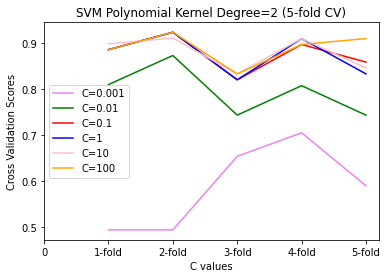

In [57]:
plt.plot(range(1, 6), groups[0].loc[0.001][2:-4], color='violet', label='C=0.001')
plt.plot(range(1, 6), groups[0].loc[0.01][2:-4], color='green', label='C=0.01')
plt.plot(range(1, 6), groups[0].loc[0.1][2:-4], color='red', label='C=0.1')
plt.plot(range(1, 6), groups[0].loc[1][2:-4], color='blue', label='C=1')
plt.plot(range(1, 6), groups[0].loc[10][2:-4], color='pink', label='C=10')
plt.plot(range(1, 6), groups[0].loc[100][2:-4], color='orange', label='C=100')
plt.legend()
plt.xlabel('C values')
plt.ylabel('Cross Validation Scores')
plt.title('SVM Polynomial Kernel Degree=2 (5-fold CV)')
plt.xticks(range(6), ['0', '1-fold', '2-fold', '3-fold', '4-fold', '5-fold'])
plt.show()

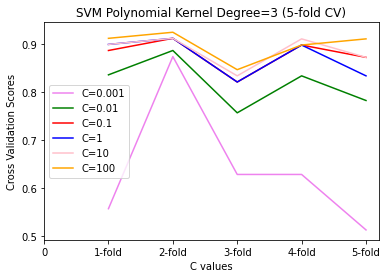

In [58]:
plt.plot(range(1, 6), groups[1].loc[0.001][2:-4], color='violet', label='C=0.001')
plt.plot(range(1, 6), groups[1].loc[0.01][2:-4], color='green', label='C=0.01')
plt.plot(range(1, 6), groups[1].loc[0.1][2:-4], color='red', label='C=0.1')
plt.plot(range(1, 6), groups[1].loc[1][2:-4], color='blue', label='C=1')
plt.plot(range(1, 6), groups[1].loc[10][2:-4], color='pink', label='C=10')
plt.plot(range(1, 6), groups[1].loc[100][2:-4], color='orange', label='C=100')
plt.legend()
plt.xlabel('C values')
plt.ylabel('Cross Validation Scores')
plt.title('SVM Polynomial Kernel Degree=3 (5-fold CV)')
plt.xticks(range(6), ['0', '1-fold', '2-fold', '3-fold', '4-fold', '5-fold'])
plt.show()

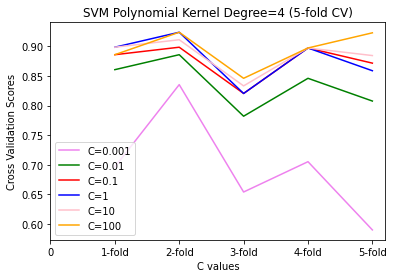

In [59]:
plt.plot(range(1, 6), groups[2].loc[0.001][2:-4], color='violet', label='C=0.001')
plt.plot(range(1, 6), groups[2].loc[0.01][2:-4], color='green', label='C=0.01')
plt.plot(range(1, 6), groups[2].loc[0.1][2:-4], color='red', label='C=0.1')
plt.plot(range(1, 6), groups[2].loc[1][2:-4], color='blue', label='C=1')
plt.plot(range(1, 6), groups[2].loc[10][2:-4], color='pink', label='C=10')
plt.plot(range(1, 6), groups[2].loc[100][2:-4], color='orange', label='C=100')
plt.legend()
plt.xlabel('C values')
plt.ylabel('Cross Validation Scores')
plt.title('SVM Polynomial Kernel Degree=4 (5-fold CV)')
plt.xticks(range(6), ['0', '1-fold', '2-fold', '3-fold', '4-fold', '5-fold'])
plt.show()